(imagerie-optique-chapitre)=
# Imagerie optique

<table>
  <tr>
    <td align="center">
      <a href="https://github.com/Xanthylajoie">
        <img src="https://avatars.githubusercontent.com/u/90349544?v=4?s=100" width="100px;" alt=""/>
        <br /><sub><b>Xanthy Lajoie</b></sub>
      </a>
      <br />
        <a title="Contenu">🤔</a>
        <a title="Révision du texte">👀</a>
    </td>
    <td align="center">
      <a href="https://github.com/pbellec">
        <img src="https://avatars.githubusercontent.com/u/1670887?v=4?s=100" width="100px;" alt=""/>
        <br /><sub><b>Pierre bellec</b></sub>
      </a>
      <br />
        <a title="Contenu">🤔</a>
        <a title="Révision du texte">👀</a>
    </td>
  </tr>
</table>

```{warning}
Ce chapitre est en cours de développement. Il se peut que l'information soit incomplète, ou sujette à changement.
```
L'imagerie optique cérébrale, encore appelée spectroscopie proche infrarouge fonctionnelle, est une technique qui permet de mesurer les corrélats vasculaires de l'activité cérébrale, de manière assez similaire à l'IRMf. En revanche, elle repose sur un principe physique très différent: la diffusion et l'absorption de la lumière dans les tissus cérébraux. Ses limites et faiblesses sont aussi bien distinctes de l'IRMf.

```{figure} imagerie_optique/fnirs.jpg
---
width: 600px
name: fnirs-fig
---
Système d'imagerie optique [NTS gowerlabs](https://www.gowerlabs.co.uk/nts-main). Image tirée de [wikipedia](https://en.wikipedia.org/wiki/Functional_near-infrared_spectroscopy#/media/File:Blonde_fNIRS_lady.jpg) sous licence [CC-BY-SA 4.0](https://creativecommons.org/licenses/by-sa/4.0).
```

Les objectifs spécifiques de ce chapitre sont :
 * Principes physiques et physiologiques de l'imagerie optique.
 * Acquisition et traitement d'images en imagerie optique.
 * Applications de l'imagerie optique en neuroscience cognitive.

## Principes physiques et physiologiques

### Lumière infrarouge et tissus biologiques

In [1]:
from IPython.display import HTML
import warnings
warnings.filterwarnings("ignore")

# Youtube
HTML('<iframe width="560" height="315" src="https://www.youtube.com/embed/61rWjVkpgh0" title="YouTube video player" frameborder="0" allow="accelerometer; autoplay; clipboard-write; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe>')

La lumière pénètre et diffuse au travers des tissus biologiques. Cela peut être observé facilement, par exemple en plaçant une lampe de poche derrière votre main. Votre main est en partie transparente et la lumière peut la pénétrer. Certains tissus vont plus absorber la lumière que d'autres, et permettre de voir le genre de tissus présent à l’intérieur de notre main. Mais quel genre de tissus exactement? cela va dépendre du genre de lumière... La lumière proche infra-rouge est intéressante de ce point de vue, car elle est particulièrement absorbée par l'hémoglobine. La vidéo ci-dessus permet ainsi d'observer assez clairement la vascularisation de la main avec de la lumière (et une caméra) proche-infrarouge. Karl von Vierordt en 1876 avait déjà pu remarquer qu'il était possible d'observer la diminution d'oxyhémoglobine dans la main avec cette technique, en limitant l'arrivée de sang dans la main au moyen d'une ligature. L'imagerie optique cérébrale repose aussi sur les propriétés physiques de la lumière proche infra-rouge dans les tissus biologiques.

### Spectre d'absorption des tissus
```{figure} imagerie_optique/spectre_hemoglobine.png
---
width: 600px
name: spectre-hemoglobine-fig
---
Niveau d'absorption de la lumière par l'oxy- et la déoxy-hémoglobine, en fonction de la longueur d'onde. La région proche infrarouge (NIR, near infra-red) est indiquée. Image tirée de [Abtahi et al. (2017)](https://doi.org/10.3390/healthcare5020020) sous licence [CC-BY 4.0](https://creativecommons.org/licenses/by/4.0).
```
Ce diagramme représente quelles longueurs d'ondes de la lumière sont absorbées par l'oxy- et la déoxy-hémoglobine, donc HbO2 (hémoglobine oxygénée en rouge) et Hb (hémoglobine non oxygénée en bleu). On peut voir qu'il y a des longueurs d'onde pour lesquelles le niveau d'absorption HbO2 vs Hb est très différent. Par exemple, à 700 nanomètres la lumière est plus absorbée par Hb, alors qu'à 900 nanomètres la lumière est plus absorbée par HbO2. Si on peut mesurer le niveau d'absorption dans le sang pour ces deux couleurs, en les comparant, on va pouvoir essayer de dissocier les concentrations en HbO2 et Hb. Un autre point important: ces longueurs d'onde sont très peu absorbées par l'eau, et la lumière proche infra-rouge va bien pénétrer dans les tissus biologiques. Donc, juste en étudiant la quantité d'absorption de deux longueurs d'onde proche infrarouge dans le cerveau, on va pouvoir quantifier le contenu en HbO2 et HB! Mais reste à savoir comment on peut faire cette mesure de manière localisée dans une petite région du cerveau.

### Diffusion de la lumière
```{figure} imagerie_optique/nir-diffusion.png
---
width: 300px
name: nir-diffusion-fig
---
Mesure localisée dans le cerveau en imagerie optique. Un *émetteur* de lumière proche infrarouge est appliqué sur le scalp. Cette lumière est diffusée dans le cerveau. Après avoir traversé une petite portion de tissus cérébraux, elle va être émise de nouveau à la surface du scalp, et mesurée par un *récepteur* Image tirée de [Abtahi et al. (2017)](https://doi.org/10.3390/healthcare5020020) sous licence [CC-BY 4.0](https://creativecommons.org/licenses/by/4.0).
```
Dans le premier exemple que l'on a vu, avec une lampe qui illumine la main, la lumière traverse notre main en ligne droite depuis la lampe, jusqu'à notre oeil. Si l'on applique le même principe au cerveau, la lumière va traverser l'ensemble des tissus, et on ne pourra pas identifier quelle région du cerveau a absorbé la lumière. On ne pourra jamais faire des images avec cette méthode.
Mais si on envoie de la lumière dans le cerveau, une partie de cette lumière va se diffuser, selon un principe de marche aléatoire. Si on regarde le scalp autour de l'émetteur de lumière, la lumière diffusée va pouvoir être mesurée. Plus on va loin de l’émetteur, et plus cette lumière a traversé loin dans le cerveau. Si on va trop loin, de nombreux tissus seront mélangés. Si on va trop près, la lumière diffusée n'aura pas pénétré jusqu'au cerveau. Mais si on met notre détecteur à la bonne distance de l’émetteur (quelques cms), cette lumière aura traversé une région spécifique du cerveau, qui aura une forme en "U".

```{admonition} Attention!
:class: caution attention
:name: nirs-warning
Seules les régions cérébrales proches du scalp pourront être mesurées précisément avec l'imagerie optique. Pour mesurer de la lumière qui a pénétré très profondément dans le cerveau, il faudra que celle ci traverse de nombreux tissus, et on n'aura pas une mesure spécifique des tissus profonds.
```

### Couplage neurovasculaire
On a maintenant vu le principe physique qui nous permet de mesurer la concentration en HbO2 et Hb dans une région (superficielle) du cerveau. Le principe physiologique sur lequel repose l'imagerie optique est le même que pour l'IRMf, c'est-à-dire le **couplage neurovasculaire**. Vous pouvez vous référez à la [section](couplage-neurovasculaire-irmf-section) du chapitre sur l'IRMf pour plus de détails. Brièvement, l'activité neuronale, notamment post-synaptique, requiert une consommation d'oxygène au niveau des cellules gliales, immédiatement à proximité des neurones concernés. Cette consommation d'oxygène va entrainer une augmentation d'HbO2 et une diminution relative d'HB à proximité des populations de neurones activés. C'est ce phénomène de couplage neurovasculaire qu'on mesure à la fois en IRMf et en imagerie optique.

## Acquisition et traitement


### Recalage avec l'anatomie
```{figure} imagerie_optique/fiducials.png
---
width: 800px
name: fiducials-fig
---
Points de repères sur la tête et alignement imagerie optique / IRM. Haut à gauche: installation d'un montage d'imagerie optique sur un jeune participant. Haut à droite: différents points de repères standards sont identifiés sur la tête du participant. Bas: ces mêmes points de repère sont manuellement identifiés sur une reconstruction 3D du visage en IRM. Ces points de repères sont utilisés pour recaler la position des émetteurs / récepteurs d'imagerie optique avec l'IRM structurelle du participant. Figure tirée de [LLoyd-Fox et al. (2014)](https://doi.org/10.1117/1.nph.1.2.025006) sous licence [CC Attribution unported 3.0](https://creativecommons.org/licenses/by/3.0/).
```
Afin de localiser l'activité cérébrale mesurée, il est courant d'utiliser une IRM structurelle du participant de recherche. Il est alors important de pouvoir situer les émetteurs et récepteurs de lumière proche infrarouge par rapport aux différentes régions du cerveau. Deux techniques principales sont utilisées. La première technique consiste à utiliser certais points de repères anatomiques sur la tête du participant, tel qu'illustré dans la {numref}`fiducials-fig`. Ces points de repère sont aussi visibles dans l'IRM structurelle, et permettent de mettre en correspondence les deux types de mesure. La deuxième approche consiste à utiliser un système de **neuronavigation**, comme par exemple ce [système](https://www.neurocaregroup.com/brainsight-nirs) qui utilise des caméras pour mettre en correspondence la position des émetteurs et récepteurs de lumière proche infrarouge avec l'IRM structurelle.

### Montage

In [2]:
# Importe les librairies
import os.path as op
import numpy as np
import matplotlib.pyplot as plt
from itertools import compress
import mne

# Charge les données
fnirs_data_folder = mne.datasets.fnirs_motor.data_path()
fnirs_cw_amplitude_dir = op.join(fnirs_data_folder, 'Participant-1')
raw_intensity = mne.io.read_raw_nirx(fnirs_cw_amplitude_dir, verbose=True)
raw_intensity.load_data()
subjects_dir = op.join(mne.datasets.sample.data_path(), 'subjects')

# Améliore les annotations du jeu de données
raw_intensity.annotations.set_durations(5)
raw_intensity.annotations.rename({'1.0': 'CTL',
                                  '2.0': 'Gauche',
                                  '3.0': 'Droite'})
unwanted = np.nonzero(raw_intensity.annotations.description == '15.0')
raw_intensity.annotations.delete(unwanted)

# Visualize le montage
fig = plt.figure(figsize=(10, 10), dpi=300)

brain = mne.viz.Brain(
    'fsaverage', subjects_dir=subjects_dir, background='w', cortex='0.5')
brain.add_sensors(
    raw_intensity.info, trans='fsaverage',
    fnirs=['channels', 'pairs', 'sources', 'detectors'])
brain.show_view(azimuth=20, elevation=60, distance=400)
brain.save_image('imagerie_optique/fnirs-montage.png')

Loading /home/pbellec/mne_data/MNE-fNIRS-motor-data/Participant-1


Reading 0 ... 23238  =      0.000 ...  2974.464 secs...


Using pyvistaqt 3d backend.



Channel types::	fnirs_cw_amplitude: 56


<Figure size 3000x3000 with 0 Axes>

```{figure} imagerie_optique/fnirs-montage.png
---
width: 600px
name: fnirs-montage-fig
---
Un montage d'émetteurs/récepteurs en imagerie optique cérébrale. La position des sources de lumière est indiquée en rouge, la position des récepteurs est indiquée en noir. La position des sources, qui correspond aux tissus cérébraux entre la source et l'émetteur, est indiquée par des points oranges, et la trajectoire de la lumière est indiquée par des traits blancs. Cette figure est générée par du code python adapté d'un [tutoriel](https://mne.tools/stable/auto_tutorials/preprocessing/70_fnirs_processing.html#sphx-glr-auto-tutorials-preprocessing-70-fnirs-processing-py) de la librairie [MNE python](https://mne.tools) (cliquer sur + pour voir le code), et est distribuée par P. Bellec sous licence [CC-BY 4.0](https://creativecommons.org/licenses/by/4.0/).
```

On voit dans la figure {numref}`fnirs-montage-fig` un montage où on va avoir différents canaux qui peuvent être activés en pairs (récepteur + émetteur). Chaque mesure est faite selon un ligne qui rejoint le récepteur à l'émetteur, et le point milieu (la _source_) est indiquée en orange. Différents montages existent, qui varient aussi bien par le nombre d'émetteurs et de récepteurs que leur disposition. Ces montages vont donner plus ou moins de résolution spatiale et d'accès aux sources profondes, et seront aussi plus ou moins dispendieux et complexes à installer selon le nombre des capteurs utilisés.

### Artefact de mouvement

Using matplotlib as 2D backend.


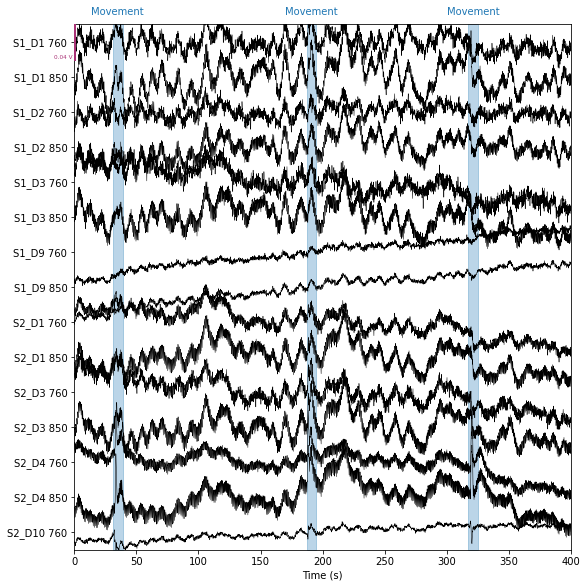

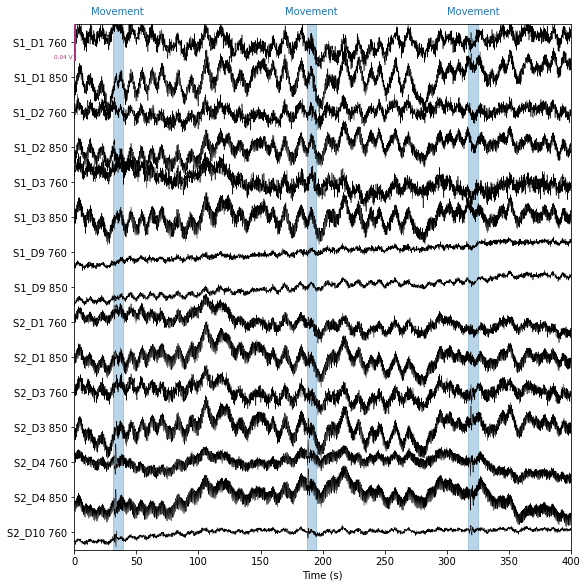

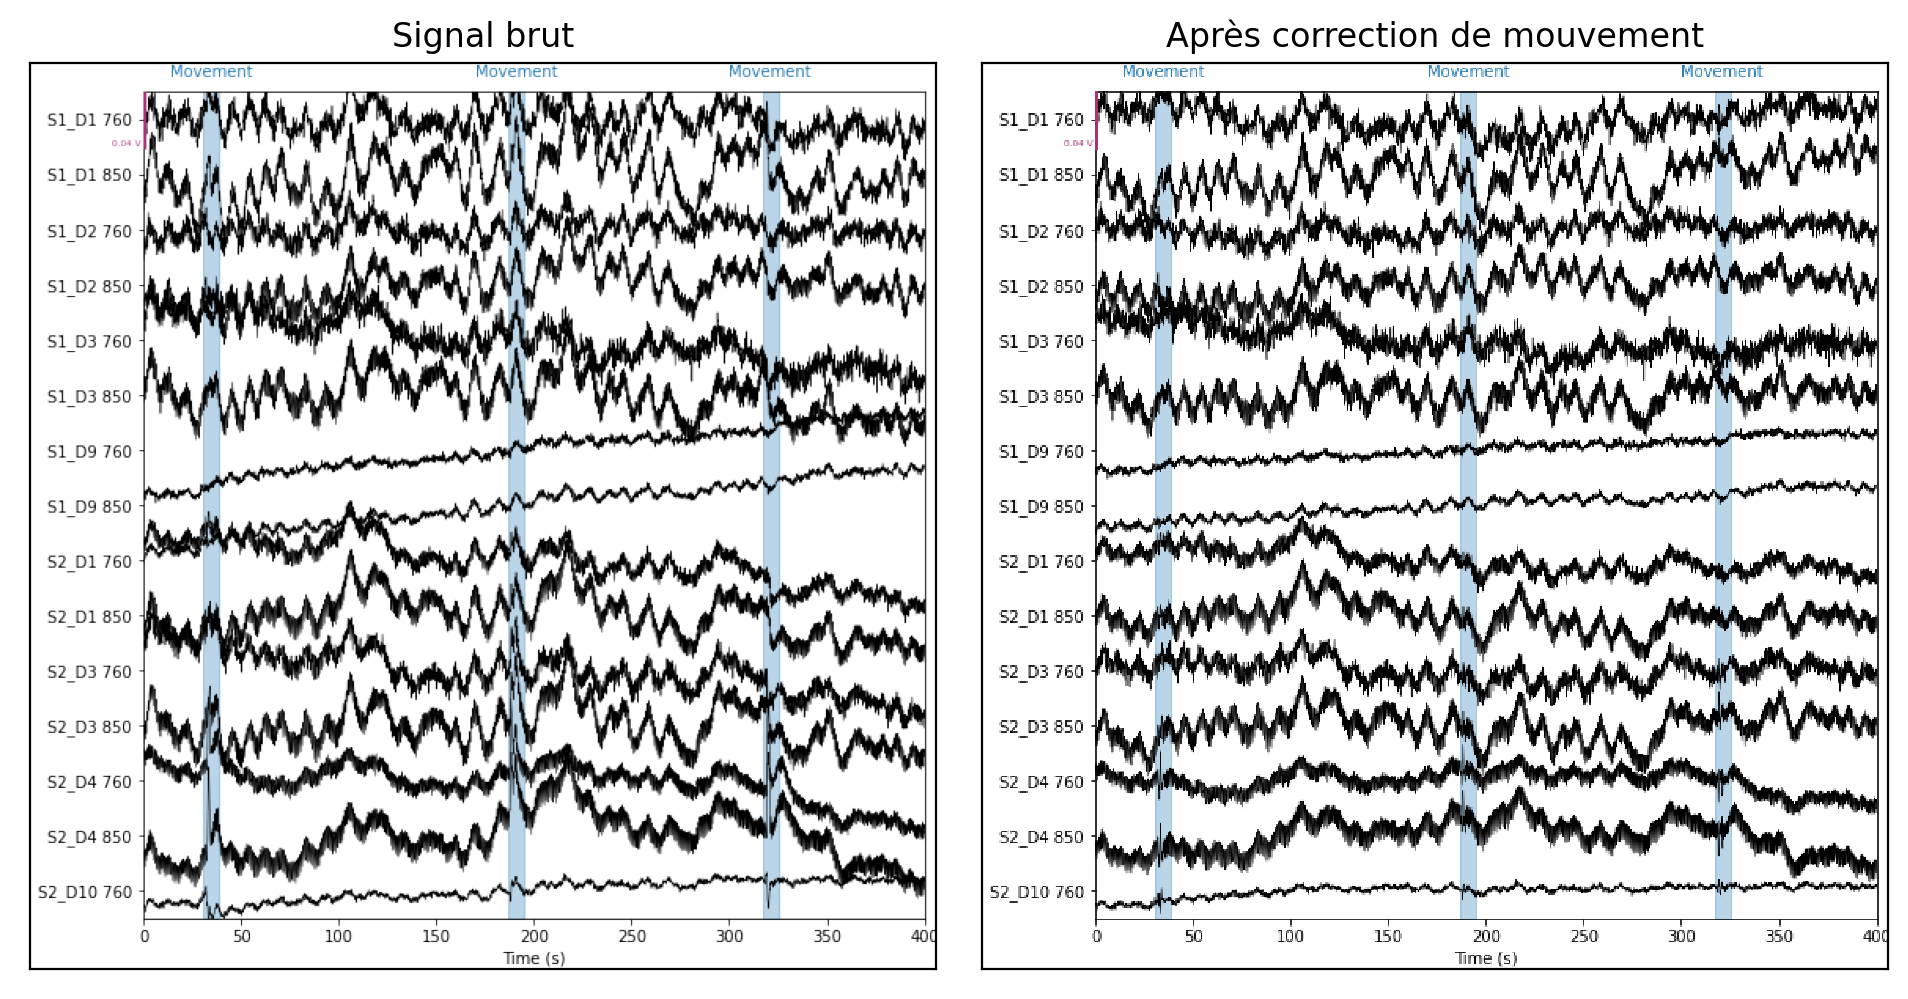

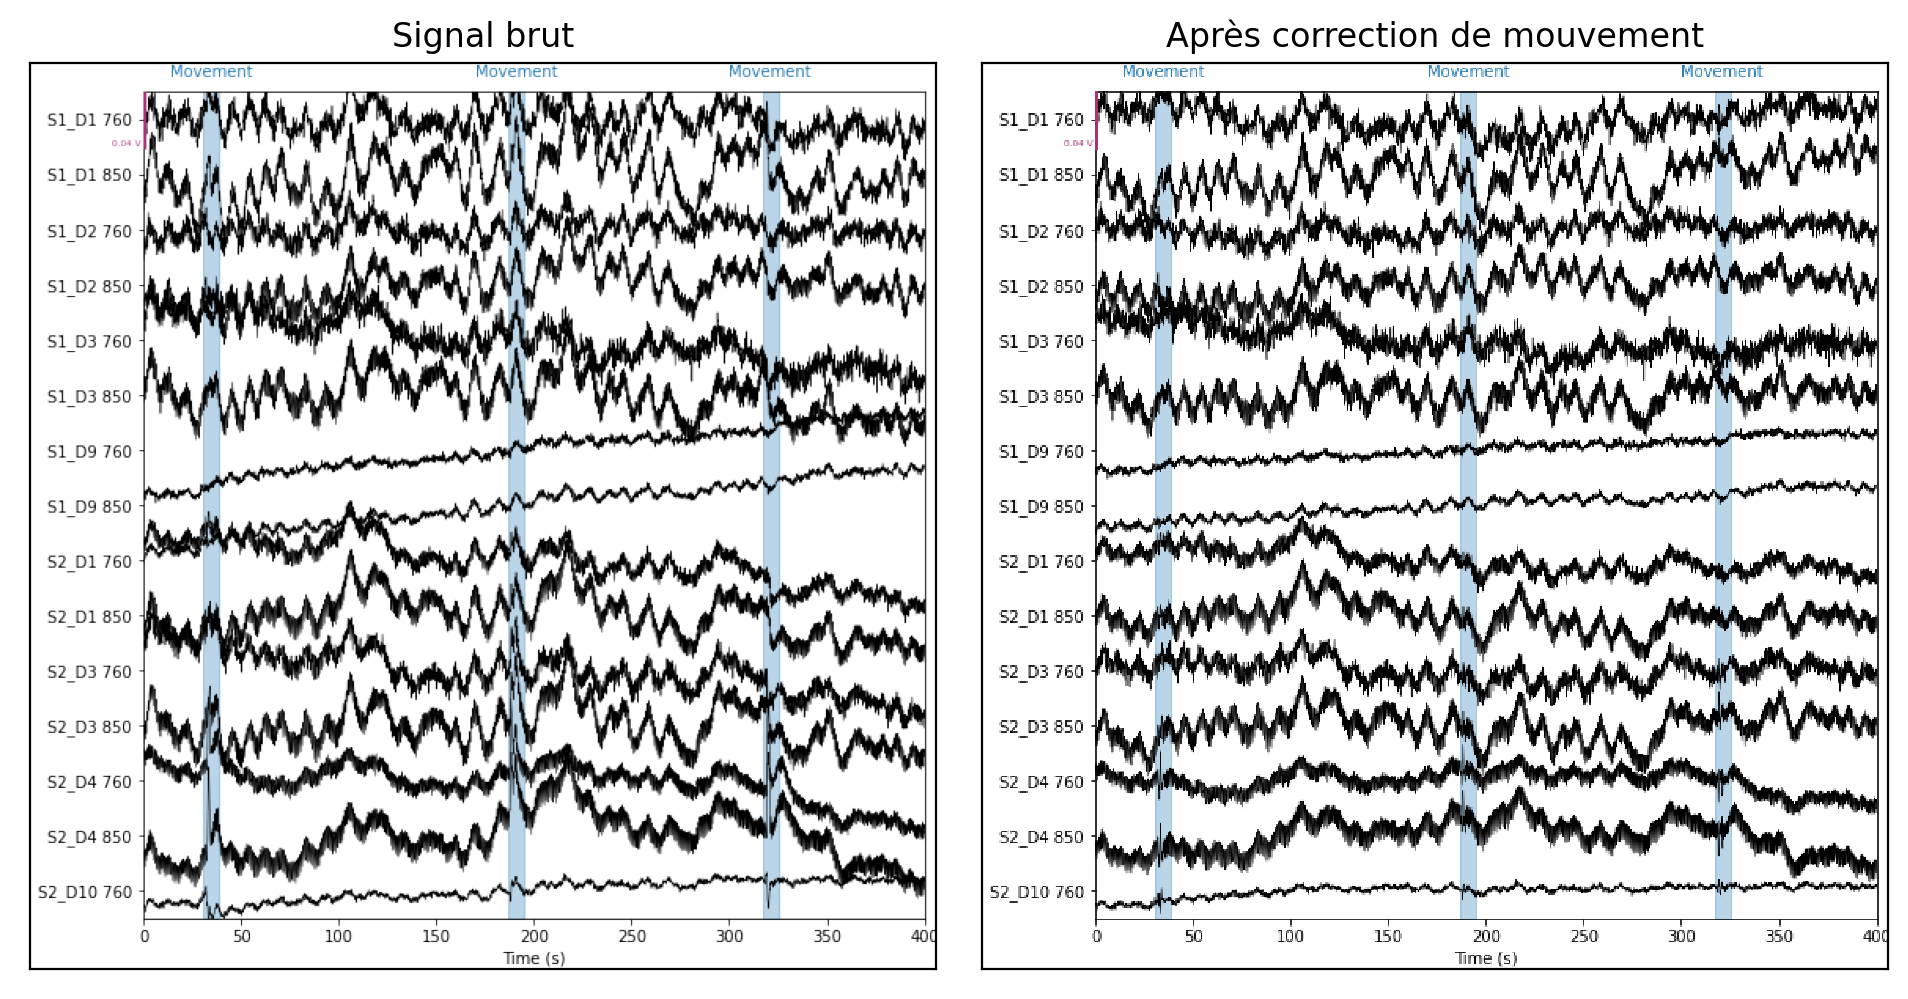

In [3]:
from mne.preprocessing.nirs import (optical_density,
                                    temporal_derivative_distribution_repair)
raw_od = optical_density(raw_intensity)
new_annotations = mne.Annotations([31, 187, 317], [8, 8, 8],
                                  ["Movement", "Movement", "Movement"])
raw_od.set_annotations(new_annotations)
plt_od = raw_od.plot(n_channels=15, duration=400, show_scrollbars=False)
plt_od.savefig("imagerie_optique/fnirs-od.png")

raw_tddr = temporal_derivative_distribution_repair(raw_od)
plot_tddr = raw_tddr.plot(n_channels=15, duration=400, show_scrollbars=False)
plot_tddr.savefig("imagerie_optique/fnirs-tddr.png")

# Make figure
from matplotlib import pyplot as plt
import imageio
fig1, ax = plt.subplots(1, 2, figsize=(12, 6), dpi=200,
                        subplot_kw={'xticks': [], 'yticks': []})
fig1.subplots_adjust(hspace=0.3, wspace=0.05)
im = imageio.imread("imagerie_optique/fnirs-od.png")
ax.flat[0].imshow(im, interpolation='antialiased')
ax.flat[0].set_title('Signal brut')
im = imageio.imread("imagerie_optique/fnirs-tddr.png")
ax.flat[1].imshow(im, interpolation='none')
ax.flat[1].set_title('Après correction de mouvement')

# Glue the figure
from myst_nb import glue
glue("fnirs-motion-fig", fig1, display=False)

```{glue:figure} fnirs-motion-fig
:figwidth: 800px
:name: "fnirs-motion-fig"
 Corrections des artefacts de mouvement dans une acquisition d'imagerie optique. Figure générée par du code python adapté d'un [tutoriel MNE python](https://mne.tools/stable/auto_examples/preprocessing/fnirs_artifact_removal.html#sphx-glr-auto-examples-preprocessing-fnirs-artifact-removal-py) par P. Bellec sous licence [CC-BY 4.0](https://creativecommons.org/licenses/by/4.0/).
```
Tout comme les données d'IRMf, les données d'imagerie optique sont sensibles au mouvement. Il est possible de tirer partie de l'excellente résolution d'acquisition de l'imagerie optique pour identifier des changements brusques dans le signal, indicateurs de mouvement. Ces changments brusques peuvent alors être corrigés, tel qu'illustré dans la {numref}`fnirs-motion-fig`.

### Filtrage

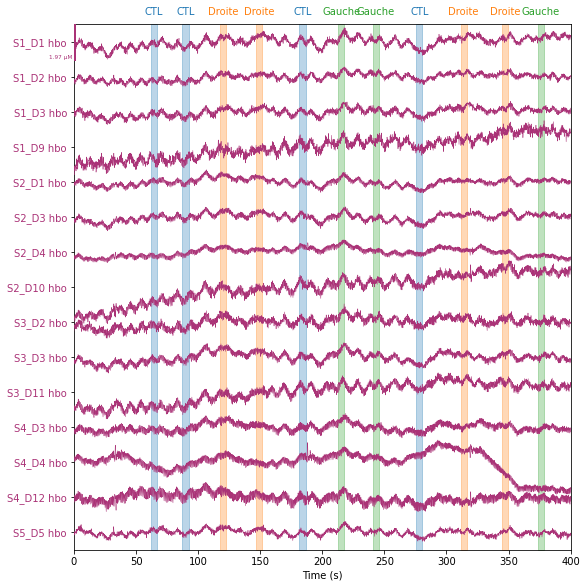

Filtering raw data in 1 contiguous segment


Setting up band-pass filter from 0.05 - 0.7 Hz


FIR filter parameters


---------------------


Designing a one-pass, zero-phase, non-causal bandpass filter:


- Windowed time-domain design (firwin) method


- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation


- Lower passband edge: 0.05


- Lower transition bandwidth: 0.02 Hz (-6 dB cutoff frequency: 0.04 Hz)


- Upper passband edge: 0.70 Hz


- Upper transition bandwidth: 0.20 Hz (-6 dB cutoff frequency: 0.80 Hz)


- Filter length: 1291 samples (165.248 sec)


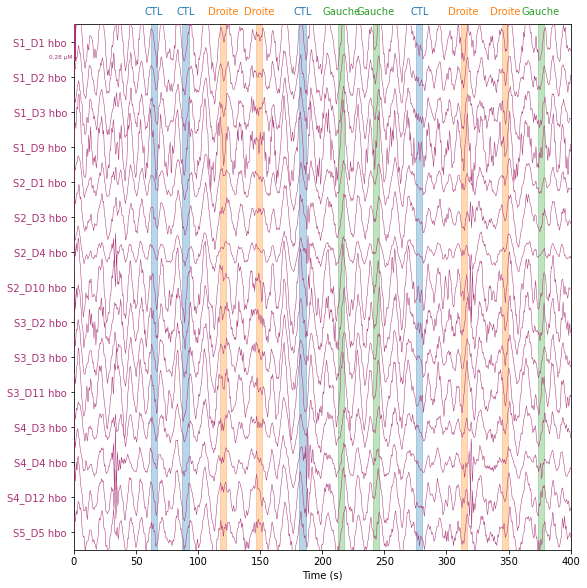

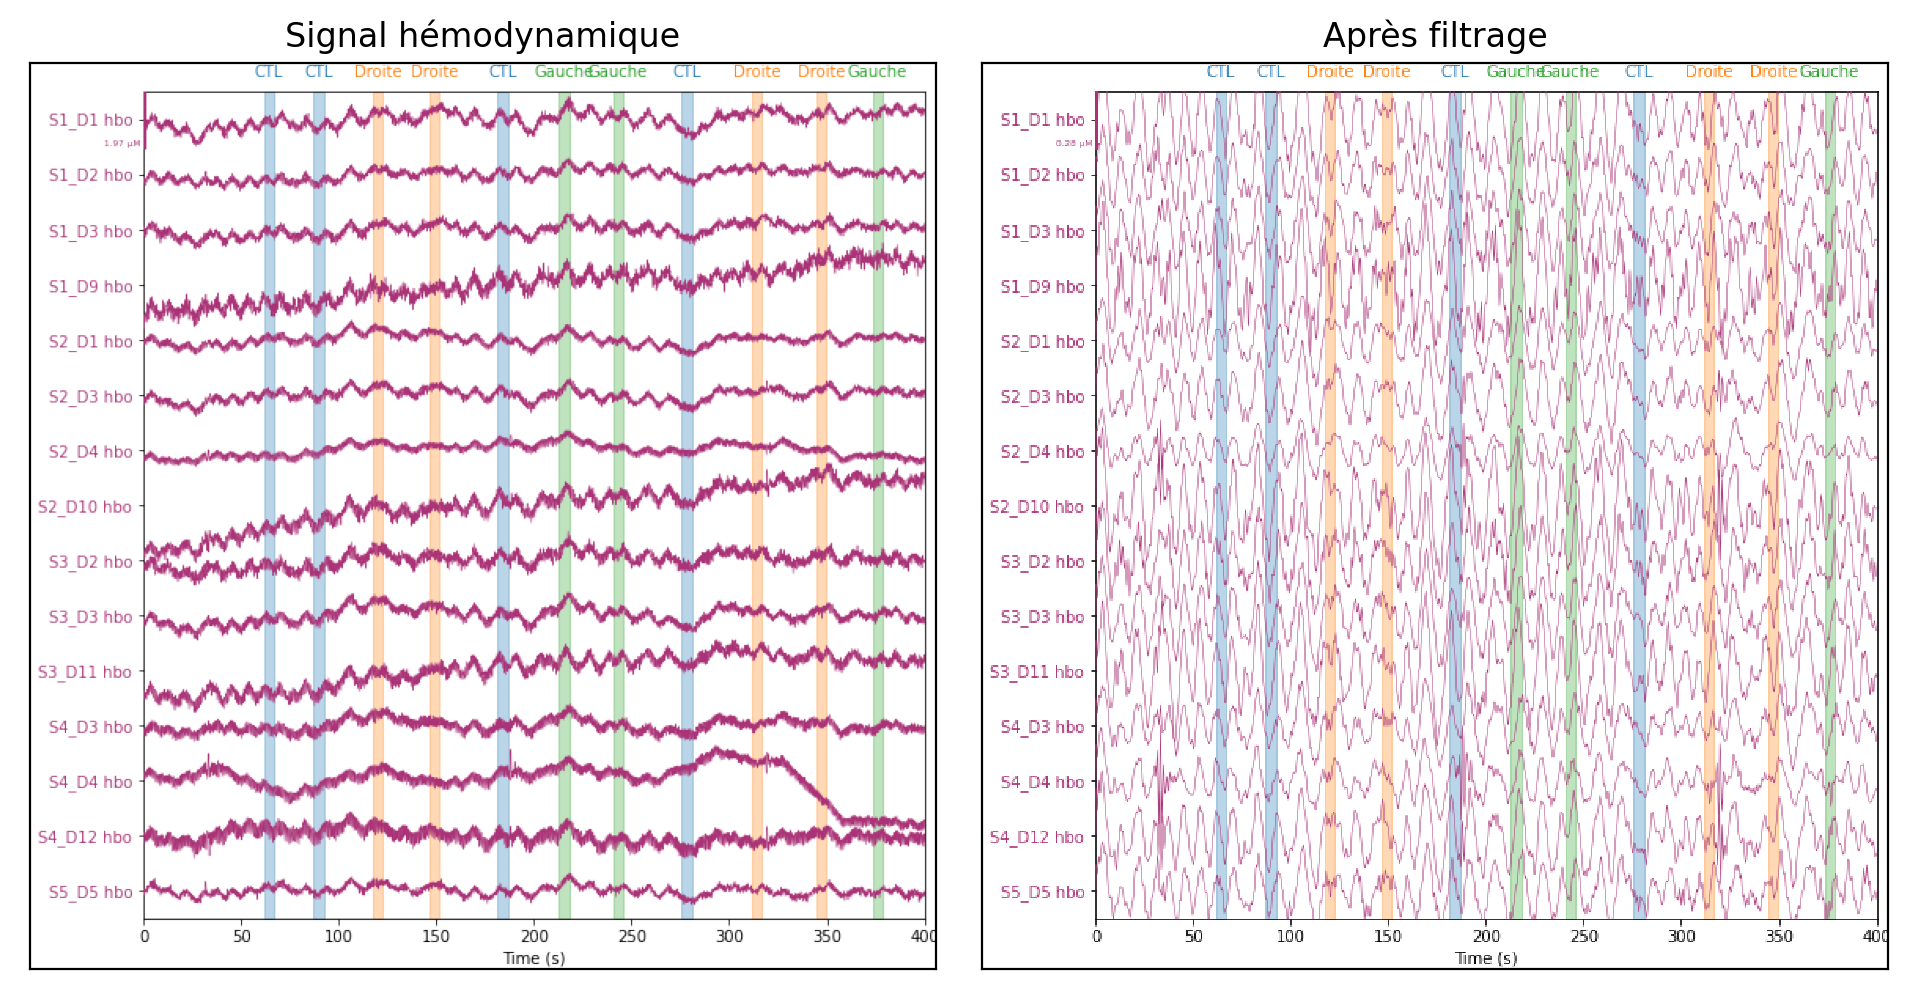

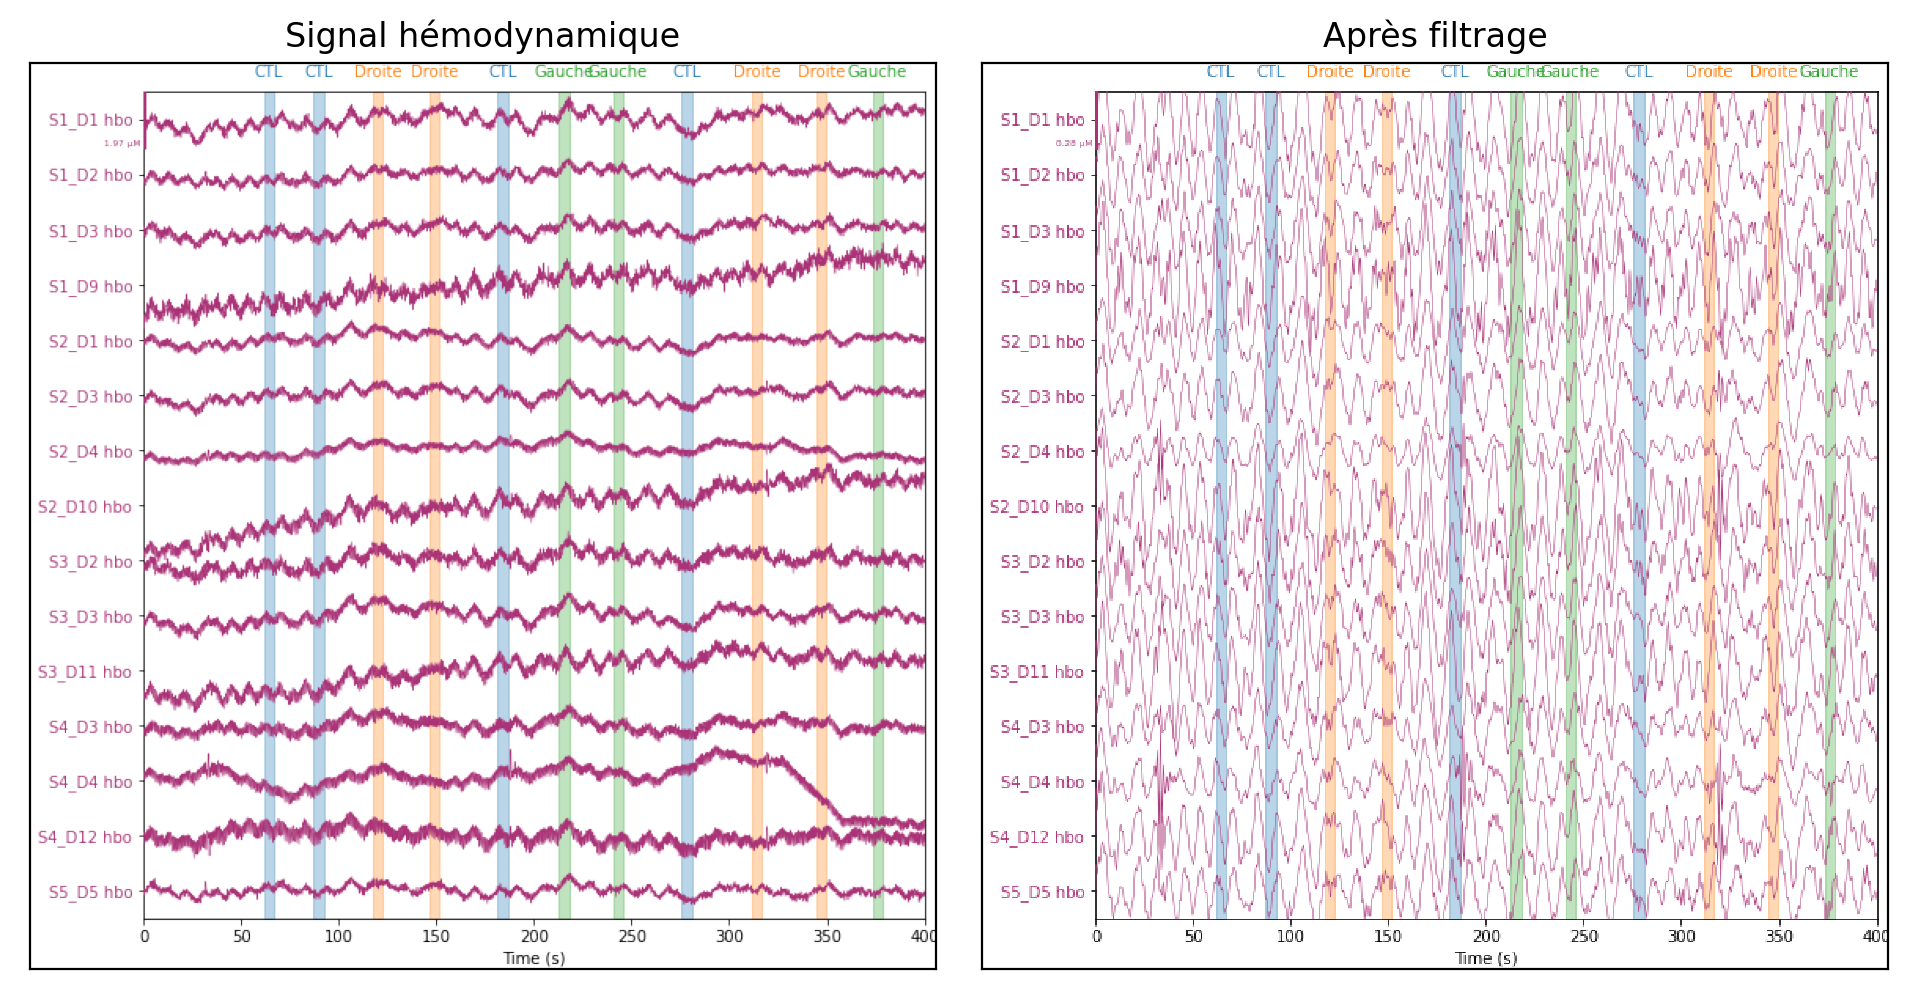

In [4]:
# Reconstruction des données d'hémoglobine
raw_od = optical_density(raw_intensity)
raw_tddr = temporal_derivative_distribution_repair(raw_od)
raw_haemo = mne.preprocessing.nirs.beer_lambert_law(raw_tddr, ppf=6)
plot_hemo = raw_haemo.plot(n_channels=15, scalings="auto",
              duration=400, show_scrollbars=False)
plot_hemo.savefig('imagerie_optique/fnirs-hbo2.png')

# filtrage des données
raw_haemo = raw_haemo.filter(0.05, 0.7, h_trans_bandwidth=0.2,
                             l_trans_bandwidth=0.02)
plot_hemo = raw_haemo.plot(n_channels=15, scalings="auto",
              duration=400, show_scrollbars=False)
plot_hemo.savefig('imagerie_optique/fnirs-filtered.png')

# Make figure
from matplotlib import pyplot as plt
import imageio
fig1, ax = plt.subplots(1, 2, figsize=(12, 6), dpi=200,
                        subplot_kw={'xticks': [], 'yticks': []})
fig1.subplots_adjust(hspace=0.3, wspace=0.05)
im = imageio.imread("imagerie_optique/fnirs-hbo2.png")
ax.flat[0].imshow(im, interpolation='antialiased')
ax.flat[0].set_title('Signal hémodynamique')
im = imageio.imread("imagerie_optique/fnirs-filtered.png")
ax.flat[1].imshow(im, interpolation='none')
ax.flat[1].set_title('Après filtrage')

# Glue the figure
from myst_nb import glue
glue("fnirs-filtrage-fig", fig1, display=False)

```{glue:figure} fnirs-filtrage-fig
:figwidth: 800px
:name: "fnirs-filtrage-fig"
 Filtrage des données HbO2 pour éliminer les dérives lentes et les fréquences cardiaques. Figure générée par du code python adapté d'un [tutoriel MNE python](https://mne.tools/stable/auto_tutorials/preprocessing/70_fnirs_processing.html#sphx-glr-auto-tutorials-preprocessing-70-fnirs-processing-py) par P. Bellec sous licence [CC-BY 4.0](https://creativecommons.org/licenses/by/4.0/).
```
Un autre point commun avec l'IRMf est la présence de différentes sources de bruit, qui peuvent être réduites par des techniques de filtrage. Ces techniques sont plus efficaces en imagerie optique qu'en IRMf, car on dispose d'une meilleure résolution d'acquisition. Il est possible de supprimer les dérives lentes, comme on l'avait vu en IRMf, mais aussi d'éliminer les fréquences cardiaques, ce qui est difficile de faire en IRMf où le TR est généralement supérieur à 1 seconde.
## Application en neuroscience cognitive

### Réponse hémodynamique

Used Annotations descriptions: ['CTL', 'Droite', 'Gauche']


Not setting metadata


Not setting metadata


90 matching events found


Setting baseline interval to [-4.992, 0.0] sec


Applying baseline correction (mode: mean)


0 projection items activated


Loading data for 90 events and 157 original time points ...


0 bad epochs dropped


combining channels using "mean"


combining channels using "mean"


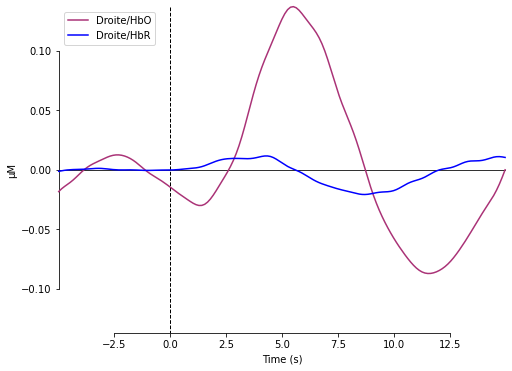

In [5]:
reject_criteria = dict(hbo=80e-6)
tmin, tmax = -5, 15
events, event_dict = mne.events_from_annotations(raw_haemo)

epochs = mne.Epochs(raw_haemo, events, event_id=event_dict,
                    tmin=tmin, tmax=tmax,
                    reject=reject_criteria, reject_by_annotation=True,
                    proj=True, baseline=(None, 0), preload=True,
                    detrend=None, verbose=True)

evoked_dict = {'Droite/HbO': epochs['Droite'].average(picks='hbo'),
               'Droite/HbR': epochs['Droite'].average(picks='hbr'),
              }

# Rename channels until the encoding of frequency in ch_name is fixed
for condition in evoked_dict:
    evoked_dict[condition].rename_channels(lambda x: x[:-4])

color_dict = dict(HbO='#AA3377', HbR='b')

plot_hrf = mne.viz.plot_compare_evokeds(evoked_dict, combine="mean", ci=0.95,
                             colors=color_dict)
plot_hrf[0].savefig('imagerie_optique/fnirs-evoked.png')

```{figure} imagerie_optique/fnirs-evoked.png
---
width: 600px
name: fnirs-evoked-fig
---
Activité HbO2 et Hb évoquée par une tâche de mouvement de doigt (tapping) et une tâche contrôle, moyennée sur l'ensemble des sources. Cette figure est générée par du code python adapté d'un [tutoriel](https://mne.tools/stable/auto_tutorials/preprocessing/70_fnirs_processing.html#sphx-glr-auto-tutorials-preprocessing-70-fnirs-processing-py) de la librairie [MNE python](https://mne.tools) (cliquer sur + pour voir le code), et est distribuée par P. Bellec sous licence [CC-BY 4.0](https://creativecommons.org/licenses/by/4.0/).
```
L'imagerie optique permet de réaliser des expériences cognitives de manière similaire à l'IRMf. Dans la {numref}`fnirs-filtrage-fig` on voit une série d'**événements** qui ont été annotés. Ces événements sont de trois types: mouvement du doigt `gauche`, mouvement du doigt `droit`, et condition de `controle`. La figure ci dessus présente les résultats d'un analyse par **potentiel évoqué**: de petites fenêtres de signal allant de 5 secondes avant chaque événement à 15 secondes après chaque événement ont été extraites et moyennées. Les données de l'ensemble des sources ont été moyennées, ainsi que les mouvements `gauche` et `droit`. Les mesure HbO2 et Hb ont en revanche été séparées. On voit un profil caractéristique de réponse hémodynamique en HbO2. Comme attendu, le Hb suit un profil inversé, avec un pic plus tardif et beaucoup plus petit (en valeur absolue). Pour cette raison, certaines études ne considèrent que HbO2. Enfin les conditions de contrôle ne démontrent aucune réponse évoquée substantielle, comme attendu.


### Carte d'activation

### Systèmes mobiles

### Comparaison avec l'IRMf et la TEP
Ici, ce qu'on fait, c'est vraiment ce que je vous ai dit qu'on ne devrait pas faire. C'est qu'on a mis une source infrarouge d'un côté et un système de détection de l'autre. Donc, en fait, on va vraiment s'intéresser à la vascularisation de l'ensemble du cerveau pas une zone en particulier. C’est donc nul pour faire de l'imagerie fonctionnelle. Par contre, on est en 1977, c’est encore nouveau donc on le fait quand même. Jobsis et ses collaborateurs avaient l’idée de faire de l’hypercapnie. Ce qui veut dire qu’on va se forcer à respirer très très vite donc en fait on augmente la concentration en oxygène dans le sang et ça cause un peu l'effet inverse de l'activité neuronale. Quand l’activité neuronale monte il y a plus de désoxyhémoglobine localement à ce moment-là et le vaisseau tout seul se dilate mais si on augmente la quantité d'oxygène dans le sang les capillaires, ce qu’ils ont tendance à faire spontanément c’est de se contracter. C’est un processus d’homéostasie de base : quand il y a trop d’oxygène, les capillaires se dilatent et quand il n’y a pas assez de désoxygène, les capillaires se contractent. Alors, quand on fait de l’hypercapnie, on augmente évidemment l'oxygénation du sang mais ça fait que la quantité de sang dans le cerveau va diminuer parce que les capillaires se contractent. Donc, la concentration en oxyhémoglobine va diminuer aussi, même s'il y a plus d’oxyhémoglobine à cause de la contraction il y en a moins ! Ce sont des mécanismes de contrôle, d’homéostasie.
Dans le graphique, l’axe des x représente le temps, le temps qui s’écoule après qu’on a fait l’hypercapnie et sur l’axe des y, c’est la quantité de photons qu’on récupère par rapport à la quantité envoyé. Si on récupère plus de photons à la sortie, ça veut dire qu’il y en a moins qui ont été absorbé. Ça veut dire qu’il y avait moins d’hémoglobine globalement, le volume sanguin était donc plus faible. C’est ce qu’on observe au cours du temps (axe x). L’augmentation de la courbe indique qu’il y a plus de lumière qui traverse, donc il y avait moins de sang dans le cerveau à la suite d’une hyperventilation.

Sur l’axe des X vous avec le temps (s) donc c'est une expérience d'à peu près 5 min, sur l’axe des y c’est le changement en concentration. Donc ici on va avoir des mesures de volume cérébral total donc est ce que ça absorber beaucoup ou pas et après en travaillant avec les différentes longueurs d'onde on peut essayer de différencier la concentration en oxyhémoglobine de la concentration en désoxyhémoglobine. Quelque chose qu’on ne peut pas faire avec l’IRMf. Ici, on peut vraiment séparer le total vs l’oxygène et désoxygène. Avec l’IRMf ce sont seulement des changements relatifs qu’on est capable de détecter. Donc, dans le graphique on peut voir que suivant la stimulation, le volume augmente. Ça ce sont nos petits capillaires qui se dilatent en réponse à l'augmentation de l’extraction d'oxygène à cause des cellules gliales (ou astrocytes). On peut voir que ça corrèle énormément à la concentration en oxy, ça anti-corrèle avec la concentration de déoxy relative et puis sinon en bas comme mesure contrôle. Le flux sanguin au niveau de la peau est complètement indépendant de ce qui se passe au niveau du cerveau. Ils auraient pu utiliser une région contrôle dans le cerveau aussi. Cette modulation vasculaire est extrêmement fine au niveau spatial non seulement elle se passe Au niveau du cortex en fait elle se passe au niveau des régions exacts impliqués dans la tâche au niveau du cortex frontal et même si on avait la résolution comme on ira fonctionnelle on pourrait distinguer ce qui se passe au niveau dernières différentes couches du cortex certain que ça cette modulation vasculaire spatialement elle est organisée de manière très fine. Oui,  il y a des gros canaux, des grosses veines, dans lequel on va avoir une accumulation des faits, mais au niveau des capillaires et des microcapillaires, le contrôle se passe de manière très très fin. C’est la fameuse réponse hémodynamique qu’on connait très bien. On a un principe physique : diffusion de la lumière + absorption sélective de lumière par différents composés chimiques. Principe physiologique : couplage neurovasculaire. C’est deux choses ensemble sont l’imagerie optique.
Ici, on peut voir des fluctuations périodiques qui vont suivre la respiration. Donc, on a le temps en secondes et si on regarde comme 20 secondes de signal étant donné que c’est de l'optique, on peut prendre plein de points de mesure et vraiment suivre notre signal de manière très fine. Tandis qu'en IRMf, pour prendre un point de mesure, vu qu’on fait la totalité du cerveau, ça peut nous prendre 1, 2 ou 3 secondes. Ici, on peut prendre un point de mesure toutes les millisecondes et on peut voir ces variations très rapides et notamment ses variations systématiques liées à la respiration. Donc, évidemment c'est des choses qu’en corrigeant, on les enlèverait. Dans quelques diapositives on va parler de paradigme fonctionnel où typiquement on va regarder des blocs d'activité, comme en IRMf, avec des durées similaires, parce qu'on regarde une réponse vasculaire. Donc, on s'intéresse à peu près au même phénomène temporel avec des blocs qui vont durer 10-20 secondes. Alors, ces fluctuations-là sont quasiment négligeables, mais reste qu'elles sont présentes. Ici, on peut facilement les voir et on peut facilement les enlever/les modéliser avec du filtrage. De plus, l'imagerie optique c'est très portable et très flexible de ce point de vue-là, mais malgré tout, ça reste sensible au mouvement. Ça ne veut pas dire qu'on ne peut pas avoir des artefacts de mouvement, il y a des gens qui utilisent l'imagerie optique dans le cadre de de l'exercice physique! Ce qui faut savoir c’est quand on bouge la tête de façon importante, ça va créer des artefacts de mouvement. C’est représenté ici, on voit une grande modification du signal (Motion Artifact) parce que le capteur et le récepteur se sont un petit peu déplacé. Alors, on ne mesure plus exactement la même zone du cerveau et ça crée des grands changements dans les mesures qu'on obtient.   
On va faire de la régression du filtrage et de la régression de facteurs de confusion sur les séries temporelles très similaires à ce qu’on fait en IRMf. On va aller essayer de détecter les pics de mouvement et les retirer.

Les 3 colonnes correspondent à des tâches différentes. La première colonne est une tâche d’opposition de doigts, donc c'est du contrôle moteur, ça va venir directement activer la région motrice primaire. Quand on bouge la main droite, on s’attends à une grosse activation à gauche. C’est effectivement ça qui se passe (blob rouge), une augmentation du sang oxygéné. Augmentation de l’activité neuronale -> augmentation du flux sanguin-> augmentation du volume sanguin-> augmentation concentration relative en oxyhémoglobine. Si on regarde du côté ipsilatéral, on s’attends à une activation beaucoup moins forte. Dans la 2ème colonne, c’est une tâche sensorielle. On va toucher la main droite du participant et au lieu d’activer de façon antérieur le cortex sensorimoteur, on vient activer postérieur au sillon central, dans le cortex sensoriel primaire. Dernière colonne, on vient stimuler le nerf médian au niveau du poignet. L’activation est moins forte mais observe le même phénomène que dans les 2 autres conditions. C’est une belle démonstration de la spécificité spatiale de la réponse. Le patron spatial est très similaire, mais moins fort au niveau sensoriel que moteur. Elles sont de part et d’autre du sillon centrale, ce ne sont vraiment pas les mêmes cortex. Cependant, en IRMf, on va très facilement distinguer ces deux cortex. Ici, on le voit moins, on voit la réponse, mais c’est sûr que la banane de diffusion de la lumière va passer à travers les 2 cortex et ça va être difficile de distinguer ce qui est en avant et en arrière du sillon central. Donc, voilà une limitation quant à la résolution spatiale de l’appareil. Pour ce qui est de la désoxyhémoglobine, c’est la même chose sauf dans le négatif.
Un avantage d’utiliser l’imagerie optique par rapport à l’IRMf, c’est qu’on peut distinguer les contributions de l’oxy et de la désoxyhémoglobine. Tandis qu’on voit un mélange des 2 dans l’IRMf.
Sur l’axe des X on a le temps et le bloc orange nous indique la durée de la stimulation et 4 courbes séparent l’hémoglobine (oxygénée, désoxygénée, controlatéral, ipsilatéral).
Pour la main droite et gauche, on a exactement les mêmes réponses, les courbes sont très similaires.
Un avantage de l’imagerie optique c’est le fait d’avoir beaucoup de points de mesure répétées et on a beaucoup de détails. On a une excellente résolution de mesure mais en termes de courbes, on observe quelque chose de très similaire avec l’IRMf, mais avec plus de points. La résolution temporelle intrinsèque de la méthode capture le même type de phénomène que l’IRMf, l’activité neuronale.

## Conclusions
La flexibilité expérimentale du dispositif.
    1. On combine l’imagerie optique à l’EEG
    2. Montage conçu pour les bébés, aucun risque pour la santé du bébé.
    3. Le système de contrôle est sur batterie et le participant peut bouger comme il le souhaite.